In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
#importing dataset 
df = pd.read_csv('Data.csv')  
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Here we can see that there are null values in item weight and outlet size columns

# Exploratory Data Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000196177D6948>,
      dtype=object)

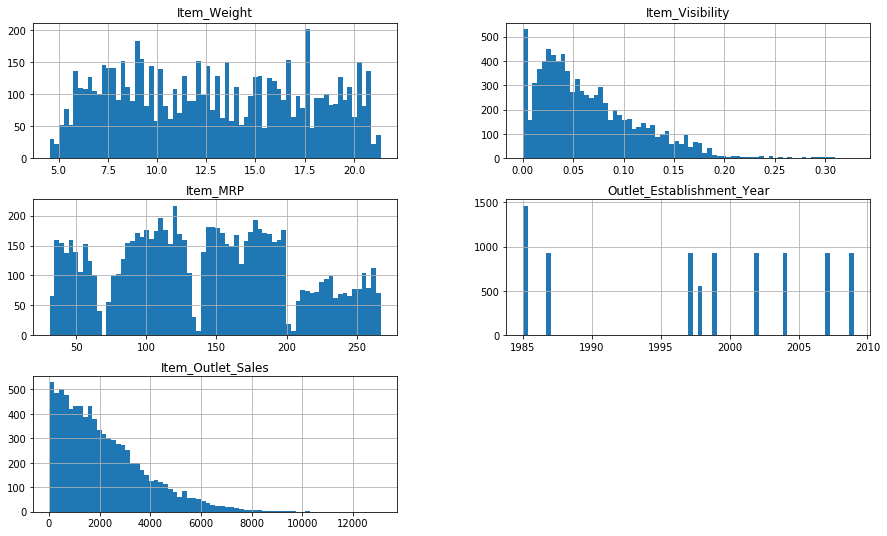

In [5]:
# Visualization plot of numerical features
df.hist(figsize=(15,9),grid=True, bins=70)

Here we can observe that item_outlet_sales is left skewed 

In [7]:
  df['Item_Outlet_Sales'].var()

2912140.938499716

# Analysing categorical features

In [8]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [9]:
df['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [10]:
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [11]:
df['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [12]:
df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [13]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

 'Item_Fat_Content' feature actually has 2 main categoreies low fat and regular. But these categories are present with different names, so now we have to combine rest of them into these two categories.

In [16]:
# Combining the different categories into 2 main categories
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({'Low Fat':'LF','low fat':'LF','Regular':'reg'})
df['Item_Fat_Content'].unique()

array(['LF', 'reg'], dtype=object)

In [19]:
num_features = df.select_dtypes(include=['number'])
num_features.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

In [20]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [22]:
# Seperating categorical features 
df_cat = df[['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Location_Type','Outlet_Type','Outlet_Size']]
df_cat.columns

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type', 'Outlet_Size'],
      dtype='object')

 ### Plotting a countplot for all categorical features

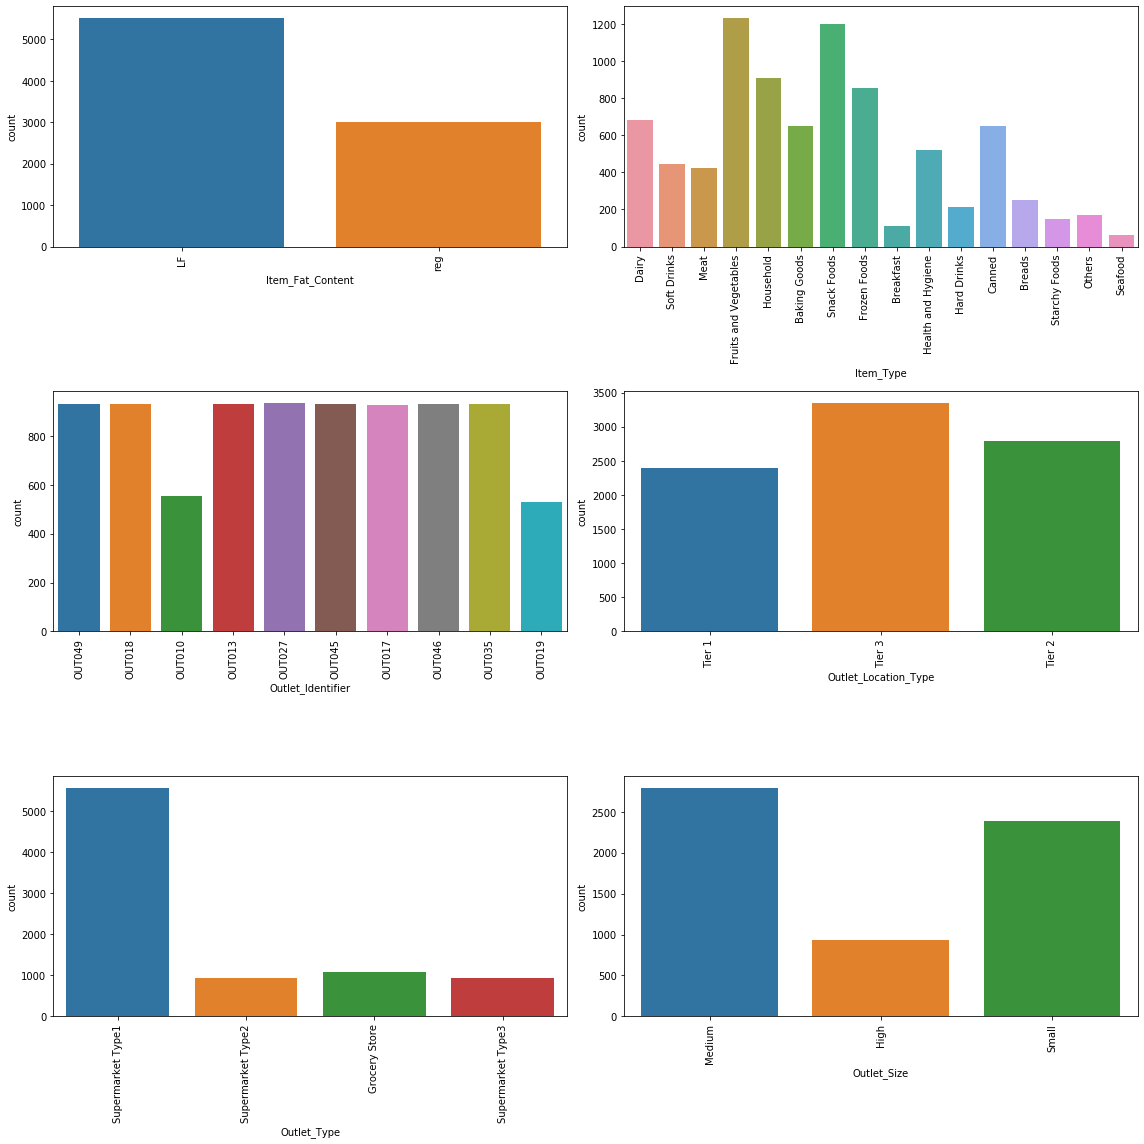

In [25]:
plt.figure(figsize=(16,16))
for i in range(1,7):
    plt.subplot(3,2,i)
    sns.countplot(df_cat[df_cat.columns[i-1]])
    plt.xticks(rotation=90)
plt.tight_layout()

<Figure size 1152x1152 with 0 Axes>

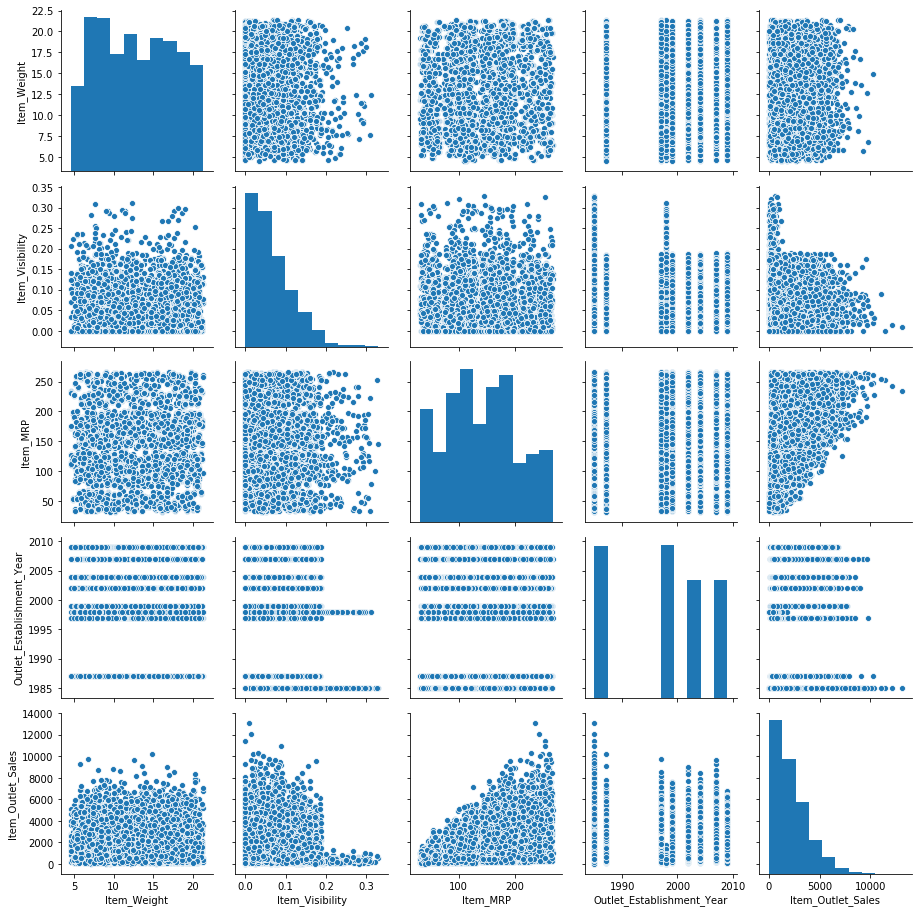

In [26]:
plt.figure(figsize=(16,16))
sns.pairplot(df)

### Now comparing categorical features with outlet sales

### Item_Type and Item_Outlet_Sales Analysis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

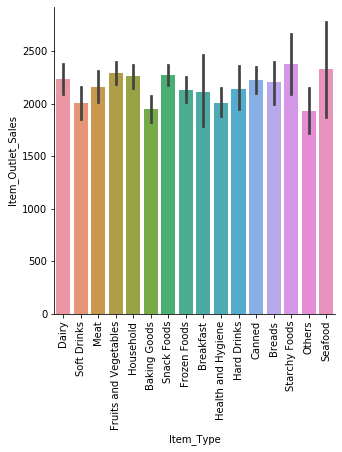

In [27]:
sns.catplot(x='Item_Type',y='Item_Outlet_Sales',data=df,kind='bar')
plt.xticks(rotation=90)

### 'Outlet_Identifier' and 'Item_Outlet_Sales' Analysis

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

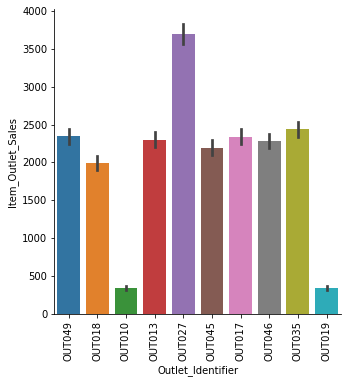

In [28]:
sns.catplot(x='Outlet_Identifier',y='Item_Outlet_Sales',data=df,kind='bar')
plt.xticks(rotation=90)

### Item_Fat_Content and Item_Outlet_Sales analysis

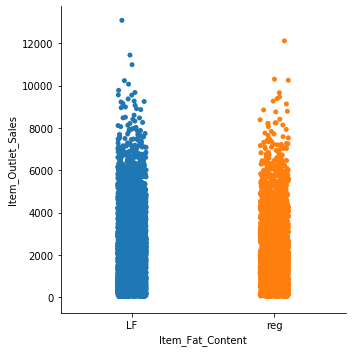

In [29]:
sns.catplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=df)

### 'Outlet_Location_Type' and 'Item_Outlet_Sales' Analysis

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

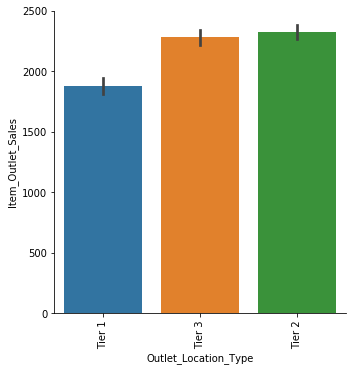

In [30]:
sns.catplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=df,kind='bar')
plt.xticks(rotation=90)

### 'Outlet_Type' and  Item_Outlet_Sales Analysis

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

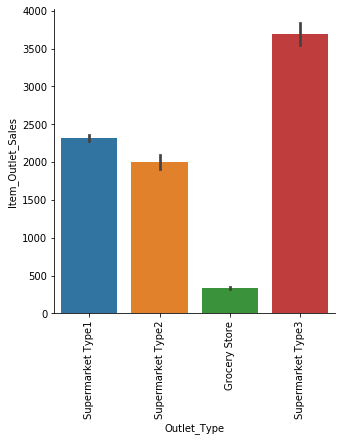

In [31]:
sns.catplot(x='Outlet_Type',y='Item_Outlet_Sales',data=df,kind='bar')
plt.xticks(rotation=90)

# Data Preprocessing

In [32]:
df.isna().any()

Item_Identifier              False
Item_Weight                   True
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                   True
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

In [33]:
#Replacing NULL values in 'Item_Weight' with mean
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())

In [34]:
#Replacing NULL values 'Outlet_Size' with mode
df['Outlet_Size'] = df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])

In [35]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,LF,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,reg,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,LF,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,reg,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,LF,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [37]:
#Filling items with 0 visibilty with mean value
df['Item_Visibility'] = df['Item_Visibility'].mask( df['Item_Visibility']==0, df['Item_Visibility'].mean())

In [38]:
df['Item_Visibility']

0       0.016047
1       0.019278
2       0.016760
3       0.066132
4       0.066132
          ...   
8518    0.056783
8519    0.046982
8520    0.035186
8521    0.145221
8522    0.044878
Name: Item_Visibility, Length: 8523, dtype: float64

In [40]:
#Combining item types into 3 categories  (food items, drinkable items and non edibles)
df['Item_Type_combined'] = df['Item_Identifier'].apply(lambda x: x[0:2])
print(df['Item_Type_combined'])

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: Item_Type_combined, Length: 8523, dtype: object


In [41]:
df['Item_Type_combined']=df['Item_Type_combined'].map({'FD':'Food','DR': 'Drink','NC':'Non-Consumable'})

In [42]:
#Replacing year of establishment with age of outlet till 2013
df['age_of_outlet'] = 2013-df['Outlet_Establishment_Year']

In [44]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_combined,age_of_outlet
0,FDA15,9.30,LF,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,reg,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drink,4
2,FDN15,17.50,LF,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.20,reg,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.93,LF,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26


In [45]:
df = df.drop(columns=['Item_Identifier','Item_Type','Outlet_Establishment_Year','Outlet_Identifier'],axis=1)
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_combined,age_of_outlet
0,9.30,LF,0.016047,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,5.92,reg,0.019278,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,Drink,4
2,17.50,LF,0.016760,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,19.20,reg,0.066132,182.0950,Medium,Tier 3,Grocery Store,732.3800,Food,15
4,8.93,LF,0.066132,53.8614,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26


In [46]:
df = df[['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type','Outlet_Type', 'Item_Type_combined','age_of_outlet','Item_Outlet_Sales']]

In [47]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_combined,age_of_outlet,Item_Outlet_Sales
0,9.30,LF,0.016047,249.8092,Medium,Tier 1,Supermarket Type1,Food,14,3735.1380
1,5.92,reg,0.019278,48.2692,Medium,Tier 3,Supermarket Type2,Drink,4,443.4228
2,17.50,LF,0.016760,141.6180,Medium,Tier 1,Supermarket Type1,Food,14,2097.2700
3,19.20,reg,0.066132,182.0950,Medium,Tier 3,Grocery Store,Food,15,732.3800
4,8.93,LF,0.066132,53.8614,High,Tier 3,Supermarket Type1,Non-Consumable,26,994.7052


# Encoding Categorical Data

In [48]:
#Encoding categorical data using dummy variables.
fat_content = pd.get_dummies(df['Item_Fat_Content'],drop_first=True)
outlet_size = pd.get_dummies(df['Outlet_Size'],drop_first=True)
loc_type = pd.get_dummies(df['Outlet_Location_Type'],drop_first=True)
outlet_Type = pd.get_dummies(df['Outlet_Type'],drop_first=True)
item_type = pd.get_dummies(df['Item_Type_combined'],drop_first=True)
df.drop(columns=['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Type_combined'],inplace=True)
df = pd.concat([df,fat_content,outlet_size,loc_type,outlet_Type,item_type],axis=1)

In [49]:
df = df[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'age_of_outlet','reg', 'Medium', 'Small', 'Tier 2', 'Tier 3',
       'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3', 'Food',
       'Non-Consumable','Item_Outlet_Sales']]

In [51]:
df.head()

,Item_Weight,Item_Visibility,Item_MRP,age_of_outlet,reg,Medium,Small,Tier 2,Tier 3,Supermarket Type1,Supermarket Type2,Supermarket Type3,Food,Non-Consumable,Item_Outlet_Sales
0,9.30,0.016047,249.8092,14,0,1,0,0,0,1,0,0,1,0,3735.1380
1,5.92,0.019278,48.2692,4,1,1,0,0,1,0,1,0,0,0,443.4228
2,17.50,0.016760,141.6180,14,0,1,0,0,0,1,0,0,1,0,2097.2700
3,19.20,0.066132,182.0950,15,1,1,0,0,1,0,0,0,1,0,732.3800
4,8.93,0.066132,53.8614,26,0,0,0,0,1,1,0,0,0,1,994.7052


## Normalizing 'Item_Outlet_Sales'

In [53]:
df['Item_Outlet_Sales'] = np.log(df['Item_Outlet_Sales'])


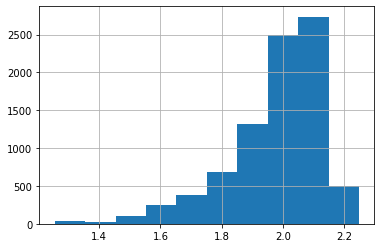

In [54]:
df['Item_Outlet_Sales'].hist()

In [55]:
df['Item_Outlet_Sales'].var()

0.02347781584493921

In [56]:
df.var()

Item_Weight            17.860122
Item_Visibility         0.002376
Item_MRP             3878.183909
age_of_outlet          70.086372
reg                     0.228327
Medium                  0.237825
Small                   0.201704
Tier 2                  0.220015
Tier 3                  0.238591
Supermarket Type1       0.226204
Supermarket Type2       0.097038
Supermarket Type3       0.097680
Food                    0.202219
Non-Consumable          0.152430
Item_Outlet_Sales       0.023478
dtype: float64

We can observe that 'Item_Weight', 'Item_MRP' and 'age_of_outlet' have very high variance.

In [58]:
# Applying log transformation on features which have high variance.
df[['Item_Weight','Item_MRP','age_of_outlet']] = np.log(df[['Item_Weight','Item_MRP','age_of_outlet']])

In [61]:
 #Checking variance after log transformation.
df.var()

Item_Weight          0.023456
Item_Visibility      0.002376
Item_MRP             0.013206
age_of_outlet        0.075341
reg                  0.228327
Medium               0.237825
Small                0.201704
Tier 2               0.220015
Tier 3               0.238591
Supermarket Type1    0.226204
Supermarket Type2    0.097038
Supermarket Type3    0.097680
Food                 0.202219
Non-Consumable       0.152430
Item_Outlet_Sales    0.023478
dtype: float64

# Splitting Dataset

In [62]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values


In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [64]:
print(X_train[0])

[0.93763671 0.05819814 1.54854134 1.2036341  0.         1.
 0.         0.         1.         0.         0.         1.
 0.         1.        ]


#  Linear Regression

In [65]:
from sklearn.linear_model import LinearRegression
le = LinearRegression()
le.fit(X_train,y_train)

LinearRegression()

In [66]:
pred = le.predict(X_test)
print(pred)

[1.8146673  1.93951324 2.06974893 ... 2.0649535  1.84272179 1.98776468]


In [67]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print('mean squared err')
print(mean_squared_error(y_test,pred))
lin_reg = mean_squared_error(y_test,pred)

mean squared err
0.005906229140889277


### Using Cross Validation 

In [68]:
from sklearn.model_selection import cross_validate
cv = cross_validate(estimator=le,X= X_test,y=y_test,scoring=('r2', 'neg_mean_squared_error'),cv=10)
print('cross validation score')
cv['test_neg_mean_squared_error'].mean()*-1    


cross validation score


0.005885856279856385

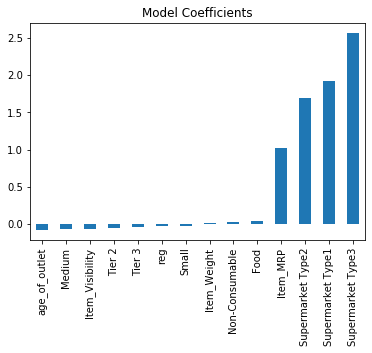

In [87]:
coef1 = pd.Series(le.coef_, df.columns[:-1]).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

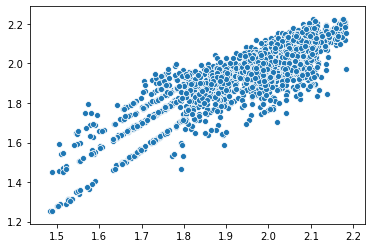

In [69]:
sns.scatterplot(pred,y_test,)

# Decision Tree

In [70]:
from sklearn.tree import  DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [71]:
pred1 = dtr.predict(X_test)
mean_squared_error(pred1,y_test)
dec_tree = mean_squared_error(pred1,y_test)
print('MSE:',dec_tree)

MSE: 0.012355996293717168


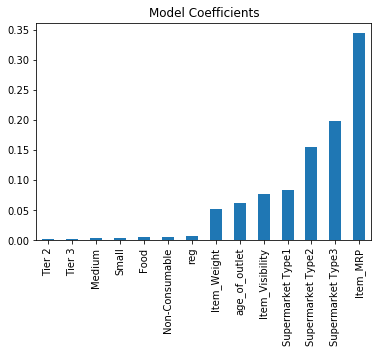

In [72]:
coef2 = pd.Series(dtr.feature_importances_, df.columns[:-1]).sort_values()
coef2.plot(kind='bar', title='Model Coefficients')

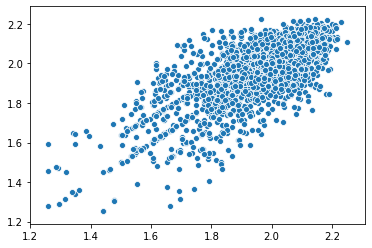

In [73]:
sns.scatterplot(pred1,y_test)

# Random Forest 

In [74]:
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor(n_estimators=20)
rfc.fit(X_train,y_train)

RandomForestRegressor(n_estimators=20)

In [76]:
pred2 = rfc.predict(X_test)
mean_squared_error(pred2,y_test)
rand_fo = mean_squared_error(pred2,y_test)

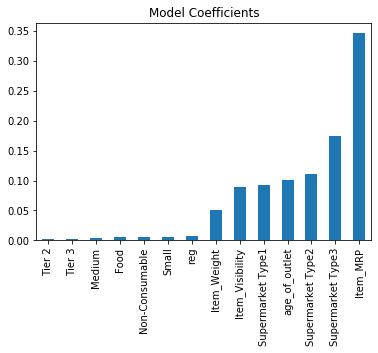

In [77]:
coef3 = pd.Series(rfc.feature_importances_, df.columns[:-1]).sort_values()
coef3.plot(kind='bar', title='Model Coefficients')

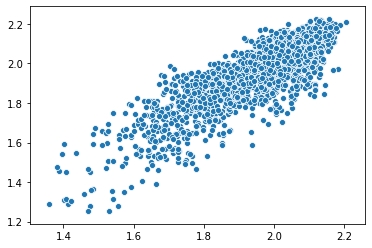

In [78]:
sns.scatterplot(pred2,y_test)

In [79]:
print(r2_score(y_test,pred2))
print(r2_score(y_test,pred1))
print(r2_score(y_test,pred))
print(r2_score(y_train,le.predict(X_train)))

0.7145372210383937
0.4925045004374098
0.7574145672161738
0.7420606829312615


# XGBOOST

In [80]:
from xgboost import XGBRegressor
xgb =XGBRegressor()
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [81]:
pred3=xgb.predict(X_test)
mean_squared_error(y_test,pred3)
print(r2_score(y_test,pred3))
rmse_xgboost = mean_squared_error(y_test,pred3)

0.7280283680079527


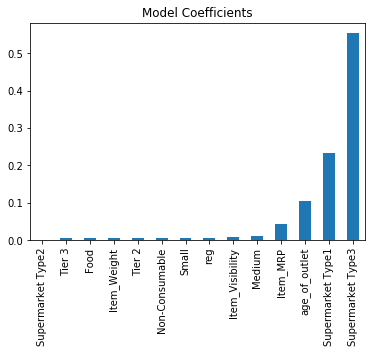

In [82]:
coef4 = pd.Series(xgb.feature_importances_, df.columns[:-1]).sort_values()
coef4.plot(kind='bar', title='Model Coefficients')

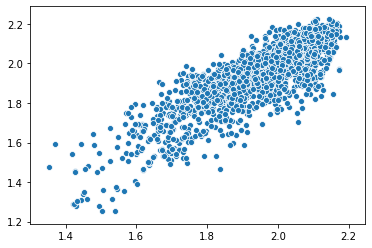

In [83]:
sns.scatterplot(pred3,y_test)

## Support Vector Regression(SVR)

In [84]:
from sklearn.svm import SVR
svr = SVR()

### Using Grid search for best parameters

In [85]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.2, 0.4, 0.6, 0.8, 1], 'kernel': ['linear']},
              {'C': [0.2, 0.4, 0.6, 0.8, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = svr,
                           param_grid = parameters,
                           scoring = 'neg_mean_squared_error',
                           cv = 20,
                           n_jobs = 2)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: -0.62 %
Best Parameters: {'C': 1, 'kernel': 'linear'}


In [86]:
svr = SVR(kernel='rbf',C=1,gamma=0.1)
svr.fit(X_train,y_train)

SVR(C=1, gamma=0.1)

In [87]:
pred4 = svr.predict(X_test)
mean_squared_error(y_test,pred4)
rmse_svr = mean_squared_error(y_test,pred4)


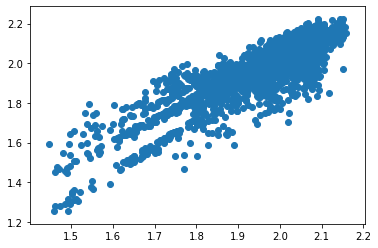

In [88]:
plt.scatter(pred4,y_test)

# Comparison between different ML models 

### On the basis of MSE

In [89]:
result = pd.DataFrame({'Model' : ['LINEAR REGRESSION','RANDOM FOREST','DECISION TREE','XGBoost','SVR'],
                       'Mean Squared Error' : [lin_reg,rand_fo,dec_tree,rmse_xgboost,rmse_svr]})
result_df = result.sort_values(by='Mean Squared Error',ascending=True) # Displaying model Mean squared Error in AScending order
result_df = result_df.set_index('Mean Squared Error')
result_df

,Model
Mean Squared Error,
0.005906,LINEAR REGRESSION
0.006150,SVR
0.006622,XGBoost
0.006950,RANDOM FOREST
0.012356,DECISION TREE


### On the basis R2 score

In [90]:
result1 = pd.DataFrame({'Model' : ['LINEAR REGRESSION','RANDOM FOREST','DECISION TREE','XGBoost','SVR'],
                       'R2_score' : [r2_score(y_test,pred),r2_score(y_test,pred2),r2_score(y_test,pred1),r2_score(y_test,pred3),r2_score(y_test,pred4)]})
result1_df = result1.sort_values(by='R2_score',ascending=True)
result1_df = result1_df.set_index('R2_score')
result1_df

,Model
R2_score,
0.492505,DECISION TREE
0.714537,RANDOM FOREST
0.728028,XGBoost
0.747387,SVR
0.757415,LINEAR REGRESSION


Linear Regression model Performed Best. It was Predicted Sales with Least Mean Squared Error Of 0.2637  and R2 score of 0.7522 

In [91]:
# Calculating adj.R2 score
r2_adj_linear = 1 - (1-r2_score(y_test,pred))*(len(pred)-1)/(len(pred)-14-1)  
r2_adj_dec= 1 - (1-r2_score(y_test,pred1))*(len(pred1)-1)/(len(pred1)-14-1)
r2_adj_rand = 1 - (1-r2_score(y_test,pred2))*(len(pred2)-1)/(len(pred2)-14-1)
r2_adj_xgb = 1 - (1-r2_score(y_test,pred3))*(len(pred3)-1)/(len(pred3)-14-1)
r2_adj_svr = 1 - (1-r2_score(y_test,pred4))*(len(pred4)-1)/(len(pred4)-14-1)



### On the basis of  Adjusted R2 Score 

In [92]:
result2 = pd.DataFrame({'Model' : ['LINEAR REGRESSION','RANDOM FOREST','DECISION TREE','XGBoost','SVR'],
                       'R2_adj_score' : [r2_adj_linear,r2_adj_rand,r2_adj_dec,r2_adj_xgb,r2_adj_svr]})
result2_df = result2.sort_values(by='R2_adj_score',ascending=True) 
result2_df = result2_df.set_index('R2_adj_score')
result2_df

,Model
R2_adj_score,
0.489709,DECISION TREE
0.712965,RANDOM FOREST
0.726530,XGBoost
0.745996,SVR
0.756079,LINEAR REGRESSION


Adjusted R2 score is very close to R2 score 

### Let's Check R2 Score for training set too  for top 2 best models which are SVR and Linear Regressor

In [93]:
result3 = pd.DataFrame({'Model' : ['LINEAR REGRESSION','SVR'],
                       'R2_score' : [r2_score(y_train,le.predict(X_train)),r2_score(y_train,svr.predict(X_train))]})
result3_df = result3.sort_values(by='R2_score',ascending=True)
result3_df = result3_df.set_index('R2_score')
result3_df


,Model
R2_score,
0.735565,SVR
0.742061,LINEAR REGRESSION


Since R2_score for Training set and Test set is very close for Both Linear Regression and SVR so we can conclude that these Models are not overfitting.

In [95]:
import pickle
# Open a file, where you ant to store the data
file = open('model.pkl', 'wb')

# Dump information to that file
pickle.dump(le, file)